## PREDICTING PITCH SUCCESS

## Data Collection

In [1]:
from pybaseball import statcast 

In [ ]:
#data = statcast(start_dt='2017-04-01', end_dt='2021-11-01') This collects the data. I commented it out because it takes a long time to run

In [15]:
df = data

In [4]:
import pickle

In [ ]:
df.to_pickle("./dummy.pkl") #savedata

In [164]:
infile = open('dummy.pkl','rb')
df = pickle.load(infile)
infile.close()

In [3]:
df = new_dict

## Data Cleaning

In [2]:
import pandas as pd 
from plotnine import ggplot, aes, geom_bar, geom_point, geom_histogram, geom_boxplot

In [5]:
df.drop(columns = ['umpire', 'spin_dir', 'sv_id', 'break_angle_deprecated', 'spin_rate_deprecated', 'break_length_deprecated', 'tfs_zulu_deprecated', 'tfs_deprecated'], inplace = True)

these columns are 100% NAs 

In [66]:
df['description'].value_counts()

ball                       1096247
hit_into_play               570196
foul                        569110
called_strike               542171
swinging_strike             338803
blocked_ball                 77878
foul_tip                     28758
swinging_strike_blocked      24731
hit_by_pitch                  9066
foul_bunt                     7680
missed_bunt                   1644
pitchout                       316
bunt_foul_tip                  158
foul_pitchout                    2
swinging_pitchout                1
Name: description, dtype: int64

This variable will be used to construct the target variable. We are looking to predict whiffs, when the pitcher gets a swing and miss, vs when the batter makes contact.

In [67]:
df['description'].isnull().sum()

0

In [6]:
df.drop(columns = ['fielder_2.1','fielder_3','fielder_4','fielder_5','fielder_6','fielder_7','fielder_8','fielder_9', 'game_date'], inplace = True) #columns not relevent

In [24]:
df.to_pickle("./dummy.pkl")  #save progress again

In [49]:
df1 =df.copy()

In [9]:
df1 = df1.drop(columns = ['delta_run_exp', 'delta_home_win_exp', 'post_fld_score', 'post_bat_score', 'post_home_score', 'post_away_score', 'fld_score', 'bat_score', 'away_score', 'home_score'], inplace = True)

In [ ]:
df1.drop(columns = ['delta_run_exp', 'delta_home_win_exp', 'post_fld_score', 'post_bat_score', 'post_home_score', 'post_away_score', 'fld_score', 'bat_score', 'away_score', 'home_score'], inplace = True)

In [30]:
df1.drop(columns = ['pitch_name'], inplace = True) 

In [53]:
df1.dropna(subset = ['pitch_type'], inplace = True)

In [54]:
df1['pitch_name'].value_counts()

4-Seam Fastball    1133690
Sinker              576878
Slider              564186
Changeup            344876
Curveball           270056
Cutter              198784
Knuckle Curve        79866
Split-Finger         50149
Knuckleball           3628
Fastball              1545
Eephus                 526
Forkball               367
Pitch Out              202
Screwball               77
Name: pitch_name, dtype: int64

Because each pitch type is different, we will have different models for each common pitch type. 

In [97]:
df4 = df1.copy()

In [98]:
cleanup_nums = {"description":     {"swinging_strike":1, "hit_into_play":0, 'foul':0, 'swinging_strike_blocked':1, 'foul_tip':1}}

In [99]:
df4 = df4.replace(cleanup_nums)

In [103]:
cleanup_nums2 = {"description":     {"ball":3, "called_strike":3, 'blocked_ball':3, 'hit_by_pitch':3, 'foul_bunt':3, 'missed_bunt':3, 'pitchout':3, 'bunt_foul_tip':3, 'foul_pitchout':3, 'swinging_pitchout':3}} #pitches that are not swung at as well as bunt attempts are labeled as 3 so they can be removed from the data

In [104]:
df4 = df4.replace(cleanup_nums2)

In [107]:
df4 = df4.astype({"description": int})

In [108]:
df4 = df4[df4.description < 2] #remove all 3s

In [109]:
df4['description'].value_counts()

0    1123537
1     383373
Name: description, dtype: int64

The data is unbalanced with far more swings that are not misses than that are misses. This will be addressed in the model notebook.

In [110]:
df4.to_pickle("./dummy2.pkl")  

In [5]:
infile = open('dummy2.pkl','rb')
df4 = pickle.load(infile)
infile.close()

In [112]:
df4['description'].isna().sum()

0

The next step is EDA. See notebook 2

In [21]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [22]:
logreg.score(X_train, y_train) 

0.757568376053011

In [23]:
logreg.score(X_test, y_test)

0.7576137546448353

In [24]:
logreg.coef_

array([[ 0.0256924 ,  0.23236175,  0.08746582,  0.02470117,  0.12200989,
         0.6201927 , -0.06717886,  0.42332337,  0.16015743,  0.51041135,
        -0.10228374, -0.05318821, -0.46508624, -0.06618545]])

In [25]:
y_pred = logreg.predict(X_test)

In [26]:
cm = confusion_matrix(y_test, y_pred)

In [27]:
cm_df = pd.DataFrame(cm)

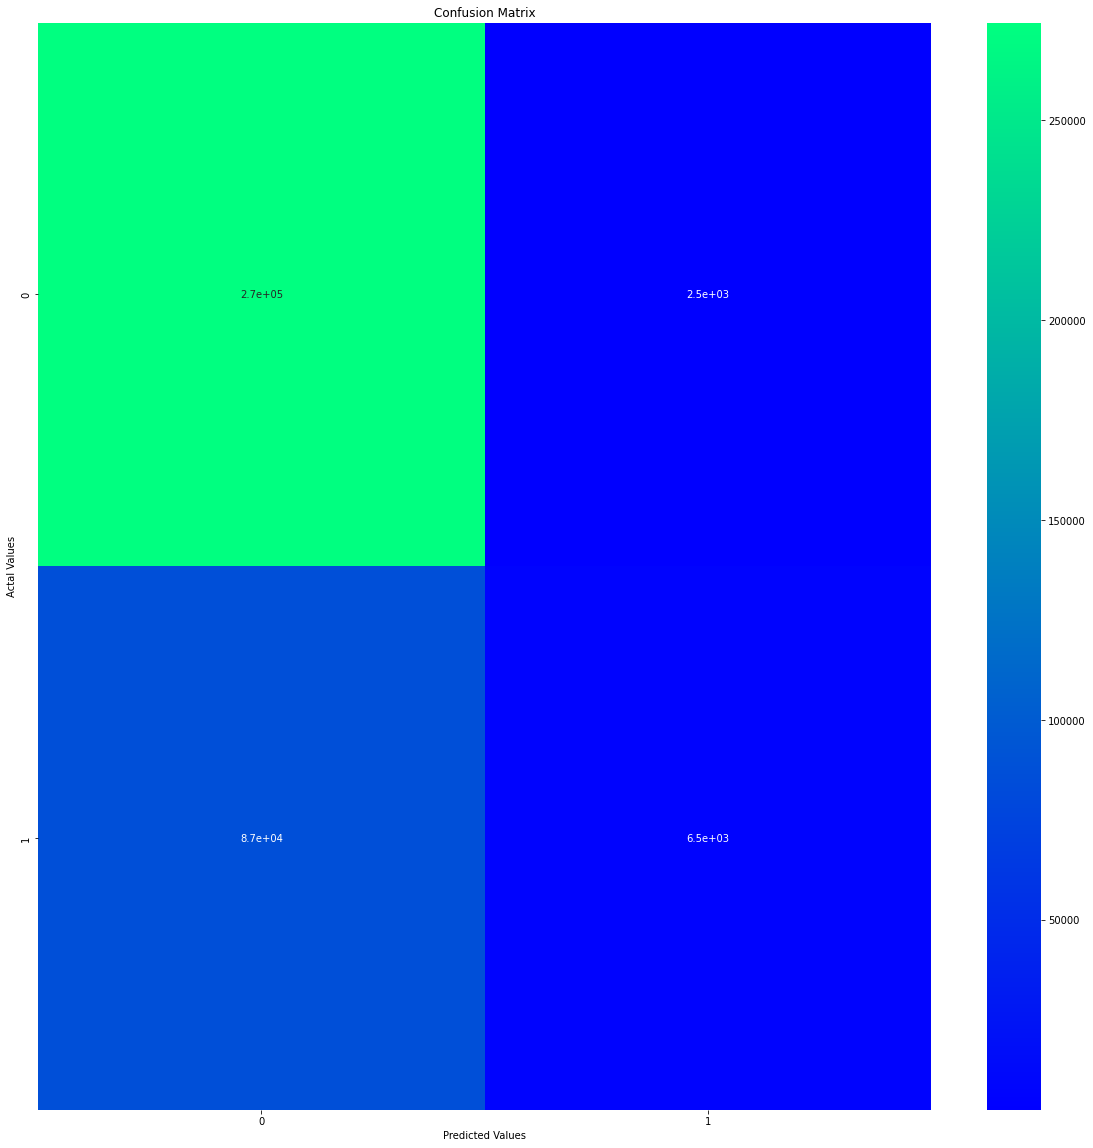

In [28]:
#Plotting the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(cm_df, annot=True, cmap = 'winter')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [17]:
oversample = im.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [38]:
X_over, y_over = oversample.fit_resample(X, y)

In [40]:
y_over.value_counts()

1    1107598
0    1107598
Name: description, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify =y_over, random_state =5)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
logreg2 = LogisticRegression()
logreg2.fit(X_train, y_train)

LogisticRegression()

In [45]:
logreg2.score(X_train, y_train) 

0.6265401947878804

In [46]:
logreg2.score(X_test, y_test)

0.6259130117605847

In [51]:
X_over, y_over = oversample.fit_resample(U, v)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify =y_over, random_state =5)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
logreg3 = LogisticRegression()
logreg3.fit(X_train, y_train)

LogisticRegression()

In [60]:
logreg3.score(X_train, y_train) 

0.6262562392818479

In [61]:
logreg2.score(X_test, y_test)

0.5226386533689726

In [21]:
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [25]:
filename = 'model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [55]:
filename = 'modeltest.sav'
pickle.dump(rf0, open(filename, 'wb'))

In [152]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

In [27]:
feature_names = ['spin_axis', 'effective_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone', 'balls', 'strikes', 'pfx_x', 'pfx_z']

In [32]:
filename = 'list.pkl'
pickle.dump(feature_names, open(filename, 'wb'))

In [69]:
gb = GradientBoostingClassifier(n_estimators = 10)
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=10)

In [70]:
gb.score(X_train, y_train)

0.619942708782418

In [71]:
gb.score(X_test, y_test)

0.6196552946473908